In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("colorblind")

# font_path = "/sailhome/akchak/.fonts/AvenirLTStd-Roman.otf"
# 
# prop = fm.FontProperties(fname=font_path)
# actual_name = prop.get_name()
# 
# plt.rcParams["font.family"] = actual_name     
plt.rcParams["font.size"] = 16             
plt.rcParams["figure.facecolor"] = "white" 
plt.rcParams["axes.facecolor"] = "white" 


In [9]:
%matplotlib inline

In [10]:
df_qwen = pd.read_csv('../results/qwen_results.csv')
df_llama = pd.read_csv('../results/llama_results.csv')

df_qwen = df_qwen.sort_values(by="step")
df_llama = df_llama.sort_values(by="step")

df_qwen_base = df_qwen[df_qwen["condition"] == "base_ppo"].sort_values("step")
df_llama_base = df_llama[df_llama["condition"] == "base_ppo"].sort_values("step")

In [11]:
phenomena = ['avg_verifications', 'avg_backtracking', 'avg_subgoals', 'avg_backwards']

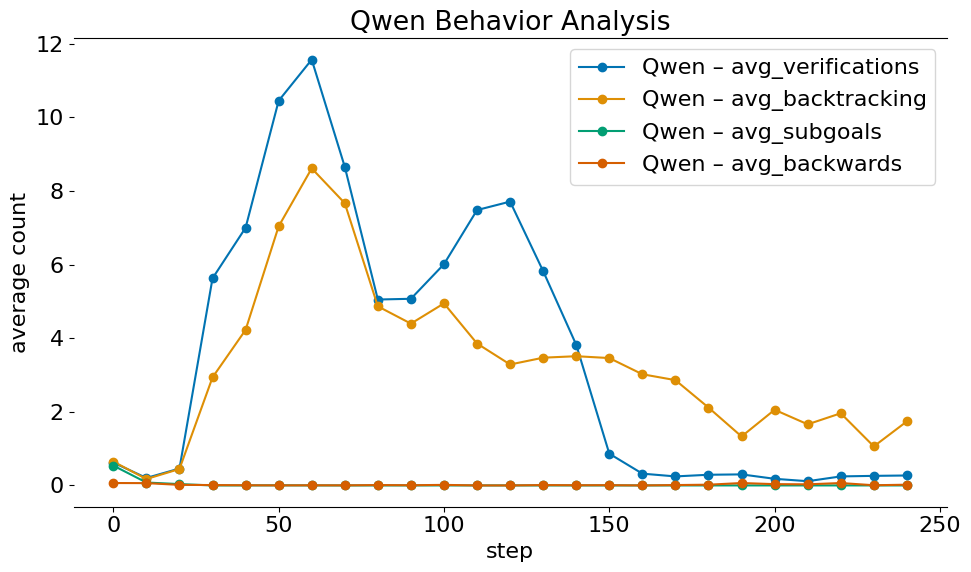

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.grid(False) 
# (If you still want x-axis gridlines, you can turn them on explicitly):
# ax.xaxis.grid(True, color="#dddddd")

for idx, phenomenon in enumerate(phenomena):
    if phenomenon in df_qwen_base.columns:
        ax.plot(
            df_qwen_base["step"],
            df_qwen_base[phenomenon],
            marker="o",
            label=f"Qwen – {phenomenon}",
            # color automatically comes from sns colorblind palette now
        )

ax.set_title("Qwen Behavior Analysis")
ax.set_xlabel("step")
ax.set_ylabel("average count")
ax.legend()
plt.tight_layout()
plt.show()

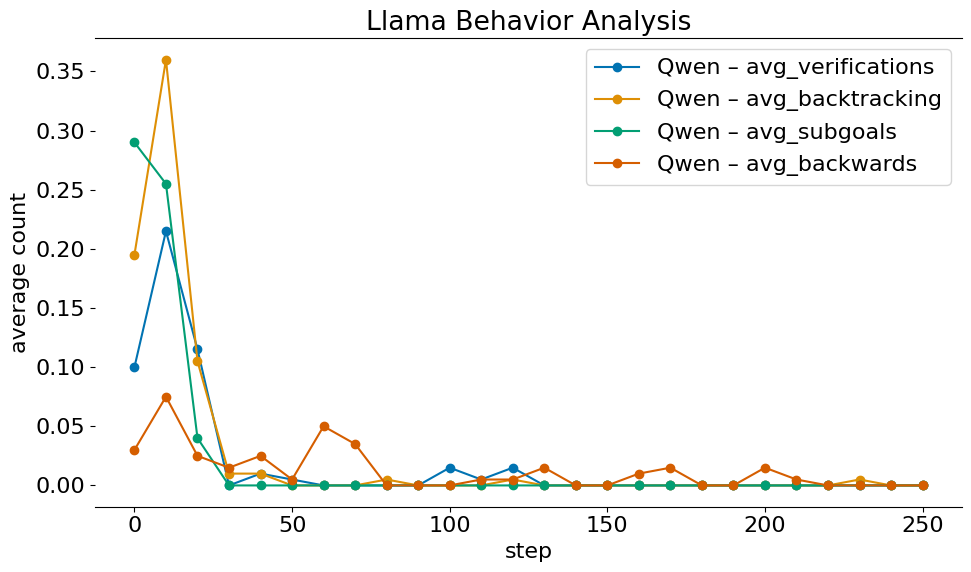

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.grid(False) 
# (If you still want x-axis gridlines, you can turn them on explicitly):
# ax.xaxis.grid(True, color="#dddddd")

for idx, phenomenon in enumerate(phenomena):
    if phenomenon in df_llama_base.columns:
        ax.plot(
            df_llama_base["step"],
            df_llama_base[phenomenon],
            marker="o",
            label=f"Qwen – {phenomenon}",
            # color automatically comes from sns colorblind palette now
        )

ax.set_title("Llama Behavior Analysis")
ax.set_xlabel("step")
ax.set_ylabel("average count")
ax.legend()
plt.tight_layout()
plt.show()


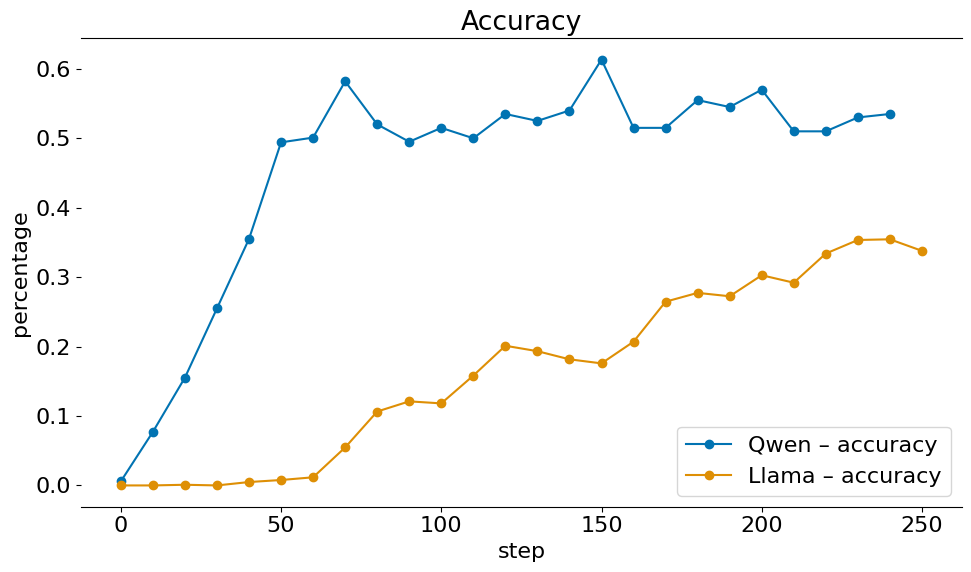

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.grid(False) 

statistics = ["accuracy"]

for i, phenomenon in enumerate(statistics):
    if phenomenon in df_qwen_base.columns:
        ax.plot(
            df_qwen_base["step"],
            df_qwen_base[phenomenon],
            marker="o",
            label=f"Qwen – {phenomenon}",
        )
    if phenomenon in df_llama_base.columns:
        ax.plot(
            df_llama_base["step"],
            df_llama_base[phenomenon],
            marker="o",
            label=f"Llama – {phenomenon}",
        )
ax.set_title("Accuracy")
ax.set_xlabel("step")
ax.set_ylabel("percentage")
ax.legend()
plt.tight_layout()
plt.show()

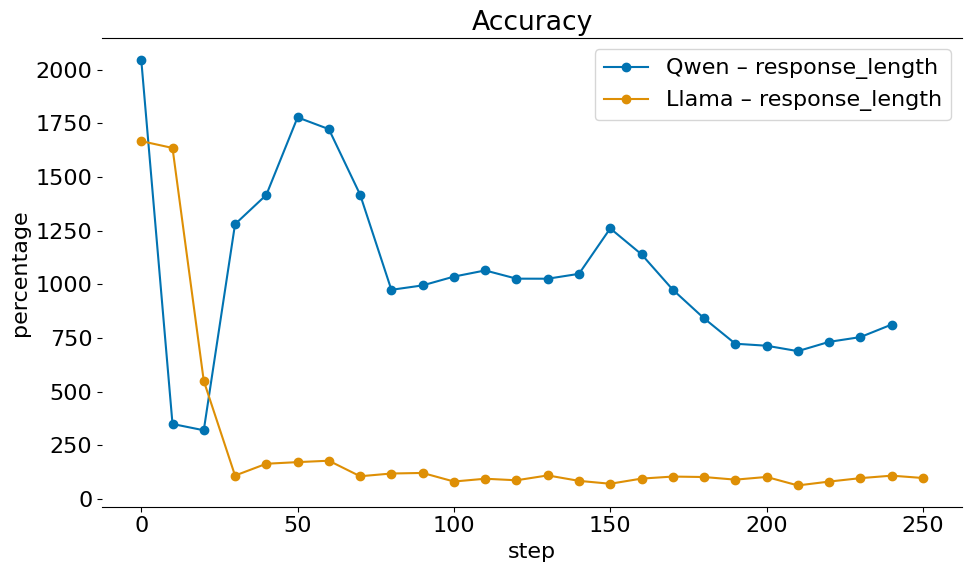

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
# Remove the left spine and y-axis gridlines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.grid(False) 

statistics = ["response_length"]

for i, phenomenon in enumerate(statistics):
    if phenomenon in df_qwen_base.columns:
        ax.plot(
            df_qwen_base["step"],
            df_qwen_base[phenomenon],
            marker="o",
            label=f"Qwen – {phenomenon}",
        )
    if phenomenon in df_llama_base.columns:
        ax.plot(
            df_llama_base["step"],
            df_llama_base[phenomenon],
            marker="o",
            label=f"Llama – {phenomenon}",
        )
ax.set_title("Accuracy")
ax.set_xlabel("step")
ax.set_ylabel("percentage")
ax.legend()
plt.tight_layout()
plt.show()